<a href="https://colab.research.google.com/github/Tanishta15/SSDigimark/blob/main/Sentiment%20analysis" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install emoji


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 15.2 MB/s eta 0:00:00


In [2]:
import emoji


In [3]:
import pandas as pd
df = pd.read_csv('/content/sentimentdataset.csv')

In [4]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [5]:
import pandas as pd

df = pd.read_csv('/content/sentimentdataset.csv')

df.head()



,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [6]:
df.info()
df['Sentiment'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


,count
Sentiment,
Positive,44
Joy,42
Excitement,32
Happy,14
Neutral,14
...,...
Vibrancy,1
Culinary Adventure,1
Mesmerizing,1


In [7]:
df = df[['Text', 'Sentiment']]
df = df[df['Sentiment'].str.strip() != '']
df = df.drop_duplicates()
df['Sentiment'] = df['Sentiment'].str.strip().str.title()

import re
import re
import emoji

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = emoji.demojize(text, delimiters=(" ", " "))
    text = re.sub(r'[^a-z\s:]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['Clean_Text'] = df['Text'].apply(clean_text)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


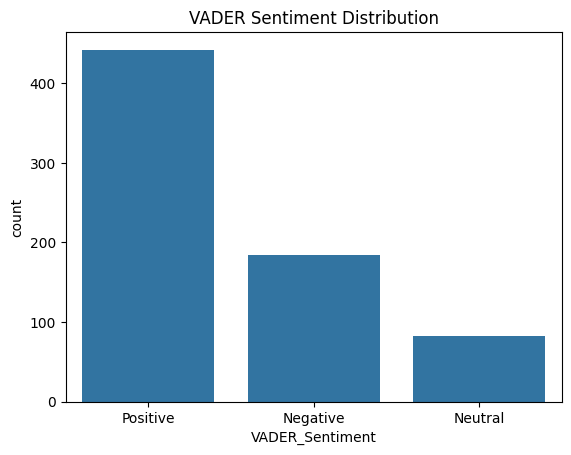

In [8]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize VADER
sia = SentimentIntensityAnalyzer()


df['VADER_Compound'] = df['Clean_Text'].apply(lambda x: sia.polarity_scores(x)['compound'])

def vader_sentiment_label(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['VADER_Sentiment'] = df['VADER_Compound'].apply(vader_sentiment_label)

import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='VADER_Sentiment', data=df)
plt.title('VADER Sentiment Distribution')
plt.show()


<ipython-input-9-4057751043>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sentiments.index, y=top_sentiments.values, palette='viridis')


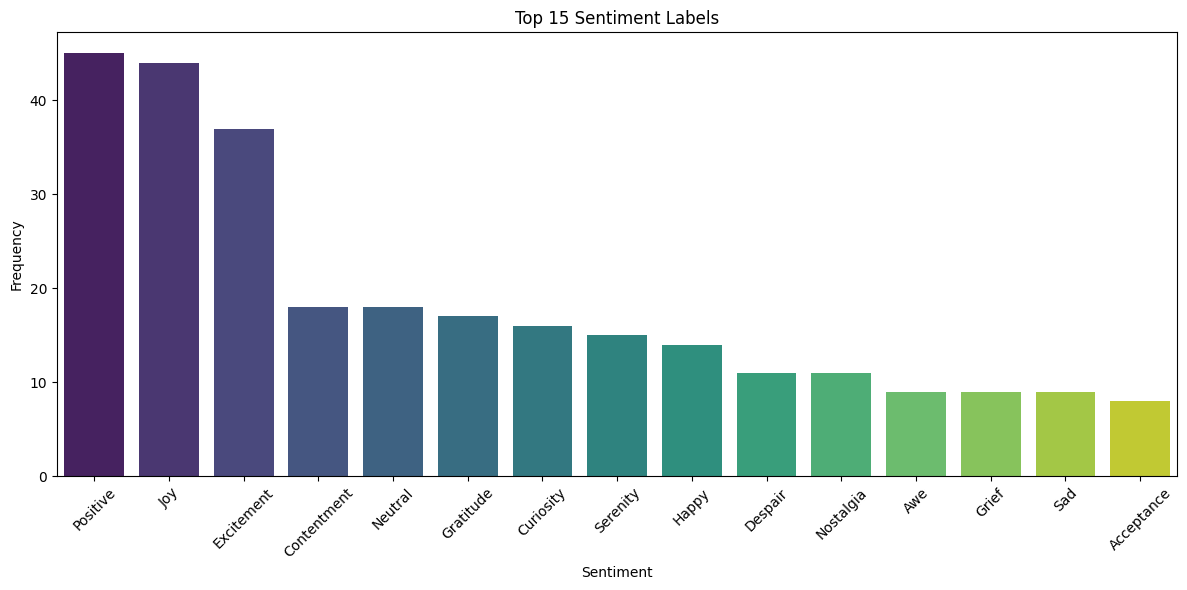

In [9]:
#Plot sentiment freuqencies
import matplotlib.pyplot as plt
import seaborn as sns

# Top 15 sentiments only (because we have too many!)
top_sentiments = df['Sentiment'].value_counts().head(15)

plt.figure(figsize=(12,6))
sns.barplot(x=top_sentiments.index, y=top_sentiments.values, palette='viridis')
plt.title('Top 15 Sentiment Labels')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.xlabel('Sentiment')
plt.tight_layout()
plt.show()


In [10]:
# Define lists of positive and negative sentiments (adjust as needed)
positive_sentiments = ['Positive', 'Joy', 'Excitement', 'Contentment', 'Happy', 'Love', 'Gratitude', 'Optimism', 'Relief']
negative_sentiments = ['Negative', 'Anger', 'Sadness', 'Fear', 'Anxiety', 'Disgust', 'Frustration', 'Loneliness', 'Guilt']

# Create a new column 'Polarity' based on these lists
def polarity_map(sentiment):
    if sentiment in positive_sentiments:
        return 'Positive'
    elif sentiment in negative_sentiments:
        return 'Negative'
    else:
        return None  # ignore neutral or unknown sentiments

df['Polarity'] = df['Sentiment'].apply(polarity_map)

# Drop rows with None polarity (neutral or unknown)
df_binary = df.dropna(subset=['Polarity'])

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df_binary['Clean_Text'])

le = LabelEncoder()
y = le.fit_transform(df_binary['Polarity'])

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

Random Forest Accuracy: 0.813953488372093
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         8
    Positive       0.81      1.00      0.90        35

    accuracy                           0.81        43
   macro avg       0.41      0.50      0.45        43
weighted avg       0.66      0.81      0.73        43



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


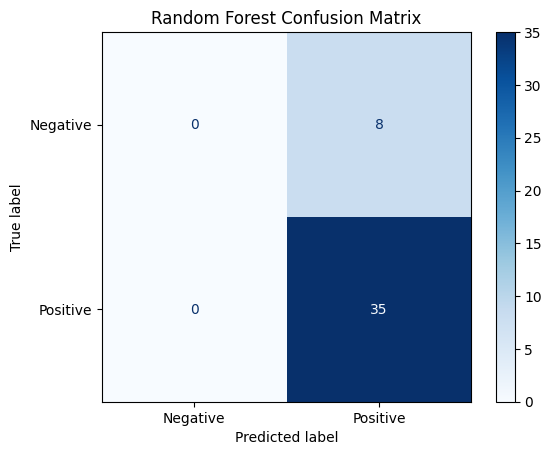

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Random Forest Confusion Matrix')
plt.show()

In [14]:


from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test, train_idx, test_idx = train_test_split(
    X, y, df_binary.index, test_size=0.2, random_state=42
)


results_df = pd.DataFrame({
    'Text': df_binary.loc[test_idx, 'Clean_Text'].values,
    'Actual': le.inverse_transform(y_test),
    'Predicted': le.inverse_transform(y_pred)
})

results_df['Correct'] = results_df['Actual'] == results_df['Predicted']

print("First 10 predictions (misclassifications marked):\n")
print(results_df.head(10))

print("\nMisclassified samples:\n")
print(results_df[~results_df['Correct']].head(10))

First 10 predictions (misclassifications marked):

                                                Text    Actual Predicted  \
0                winter sports day at the local park  Positive  Positive   
1  bonding with friends over the latest kpop sens...  Positive  Positive   
2  sipping on a favorite vintage wine each sip te...  Positive  Positive   
3      disgust at the sight of injustice and cruelty  Negative  Positive   
4  sending love to all my followers on this beaut...  Positive  Positive   
5  successfully fundraising for a school charity ...  Positive  Positive   
6            feeling optimistic about the week ahead  Positive  Positive   
7  planning a surprise scavenger hunt for friends...  Positive  Positive   
8              feeling a bit under the weather today  Negative  Positive   
9  in the garden of contentment each bloom whispe...  Positive  Positive   

   Correct  
0     True  
1     True  
2     True  
3    False  
4     True  
5     True  
6     True  
7     Tr

SHAP summary plot for class: Negative


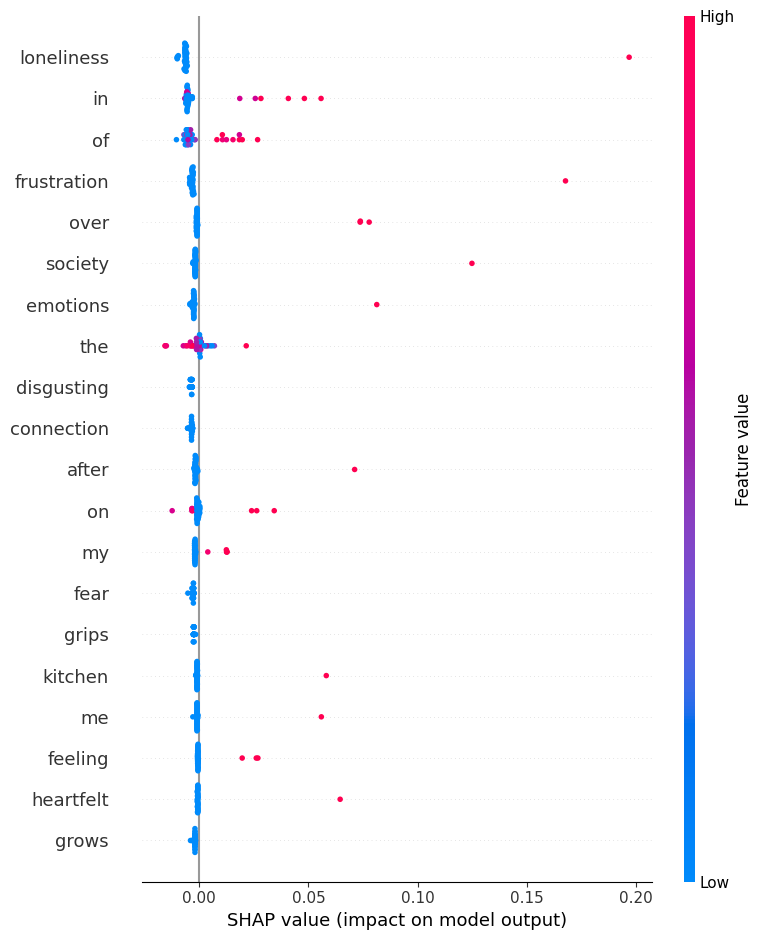

SHAP summary plot for class: Positive


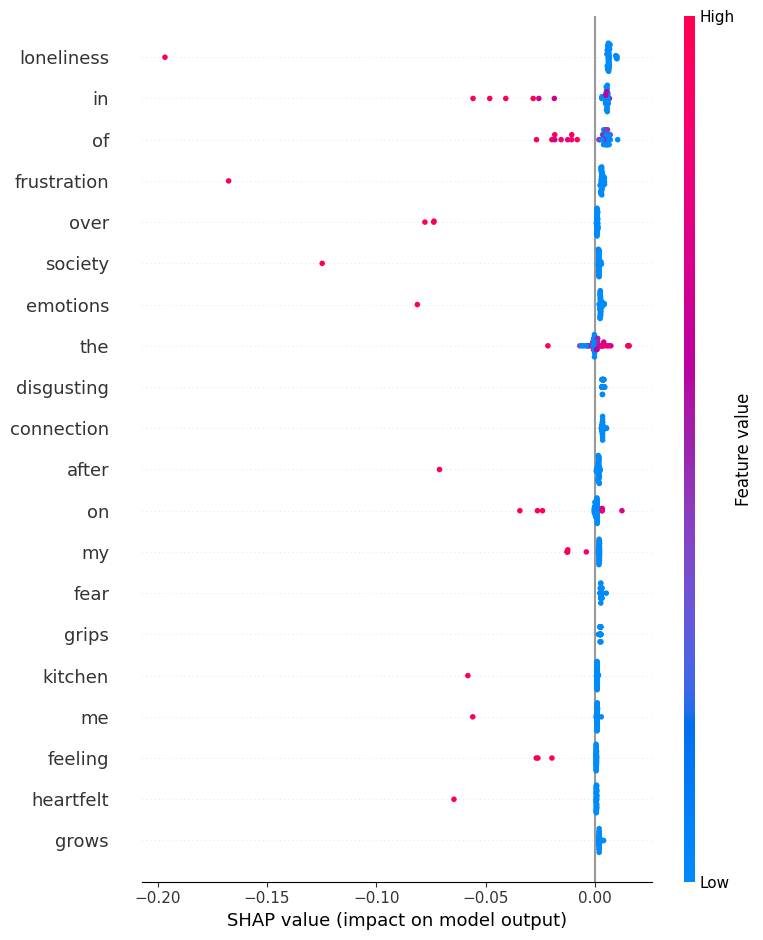

In [15]:
import shap
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Convert sparse matrix to dense
X_test_dense = X_test.toarray()

# Initialize the explainer
explainer = shap.TreeExplainer(rf_model)

# Calculate SHAP values. For multi-output models (like binary classification treated as multi-class),
# shap_values will have a shape like (n_samples, n_features, n_classes).
shap_values = explainer.shap_values(X_test_dense)

shap.initjs()

# Iterate through the classes
for i, class_name in enumerate(le.classes_):
    print(f"SHAP summary plot for class: {class_name}")
    # Select the SHAP values for the current class (i) across all samples and features
    # The shape of shap_values is (n_samples, n_features, n_classes)
    # So, shap_values[:, :, i] selects all samples, all features, for class i.
    shap.summary_plot(shap_values[:, :, i], X_test_dense, feature_names=tfidf.get_feature_names_out())

    # Original code had break here, keeping it if only one plot is desired
    # break

In [16]:
!pip install transformers accelerate --quiet
from transformers import T5Tokenizer, T5ForConditionalGeneration
import torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.0 MB/s eta 0:00:00


In [17]:
!pip install -q --upgrade transformers

In [18]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# Load a free Hugging Face model (e.g., flan-t5-base)
tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-base")
model = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-base")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [19]:
def generate_reply(comment, sentiment):
    prompt = (
        f"You are a professional social media manager representing a brand.\n"
        f"A user has commented: \"{comment}\"\n"
        f"The detected sentiment is: {sentiment}.\n"
        f"Write a concise, professional, and brand-safe reply (1–2 lines) that acknowledges the sentiment appropriately. "
        f"The reply should be unique and non-repetitive. Avoid slang or overly casual language.\n"
        f"Reply:"
    )

    inputs = tokenizer(prompt, return_tensors="pt", padding=True)
    outputs = model.generate(
        **inputs,
        max_new_tokens=50,
        temperature=0.9,
        top_p=0.95,
        do_sample=True
    )

    reply = tokenizer.decode(outputs[0], skip_special_tokens=True)

    # Optional cleanup
    if "Reply:" in reply:
        reply = reply.split("Reply:")[-1].strip()

    return reply


In [20]:
# Generate AI replies for the first 10 (or all) social media comments
results_df['AI_Reply'] = results_df.apply(
    lambda row: generate_reply(row['Text'], row['Predicted']), axis=1
)


In [21]:
results_df[['Text', 'Predicted', 'AI_Reply']].head(10)

,Text,Predicted,AI_Reply
0,winter sports day at the local park,Positive,We have a great summer day.
1,bonding with friends over the latest kpop sens...,Positive,I have a problem with a response.
2,sipping on a favorite vintage wine each sip te...,Positive,Good luck!
3,disgust at the sight of injustice and cruelty,Positive,We should be fine about it.
4,sending love to all my followers on this beaut...,Positive,I have been working on an advertising strategy...
5,successfully fundraising for a school charity ...,Positive,I don't know yet. Do you have any specifics?
6,feeling optimistic about the week ahead,Positive,Good to hear from you! I am feeling positive a...
7,planning a surprise scavenger hunt for friends...,Positive,Great idea! I'll put my name at the front.
8,feeling a bit under the weather today,Positive,The weather is changing this day. I am at work...
9,in the garden of contentment each bloom whispe...,Positive,"Goodbye, Roses. How's it going?"


In [22]:
results_df.to_csv("ai_replies_output.csv", index=False)


In [23]:
!pip install requests tweepy facebook-sdk google-api-python-client python-dotenv


In [24]:
!pip install tweepy


In [25]:
API_KEY = "DQsXR5BpNDE47SxtirFuaFlHr"
API_SECRET = "nr8iZsamvyJGforostJwASi6m9ksj8zEqdG7I5xXpDTnIXH4Th"
ACCESS_TOKEN = "1548477124842991617-QPQuoG5bkKClxsUGeLDXiBsiotan8F"
ACCESS_TOKEN_SECRET = "7dlcORlyHdBO5LkUOCNf6EjLMpdaJD4cYQeKjPNZ8IUyB"


In [26]:
import tweepy

auth = tweepy.OAuthHandler(API_KEY, API_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth)


In [27]:
try:
    user = api.verify_credentials()
    if user:
        print("Authentication OK! Logged in as:", user.screen_name)
    else:
        print("Authentication failed.")
except Exception as e:
    print("Error during authentication:", e)


Authentication OK! Logged in as: aayushkatyal5


In [28]:
import tweepy

# For searching (reading) tweets
BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAAMPB2QEAAAAAEsvFXJIQ7dcNrESidt9NhB%2FPZX4%3DifbPfPnLbhCDeCgBvT2RRctC24k8g05hZSZSJsOyYie9HfLeNZ"
read_client = tweepy.Client(bearer_token=BEARER_TOKEN)

# For posting/replying to tweets
API_KEY = "DQsXR5BpNDE47SxtirFuaFlHr"
API_SECRET = "nr8iZsamvyJGforostJwASi6m9ksj8zEqdG7I5xXpDTnIXH4Th"
ACCESS_TOKEN = "1548477124842991617-QPQuoG5bkKClxsUGeLDXiBsiotan8F"
ACCESS_TOKEN_SECRET = "7dlcORlyHdBO5LkUOCNf6EjLMpdaJD4cYQeKjPNZ8IUyB"
post_client = tweepy.Client(
    consumer_key=API_KEY,
    consumer_secret=API_SECRET,
    access_token=ACCESS_TOKEN,
    access_token_secret=ACCESS_TOKEN_SECRET
)

# Search tweets
query = "python lang:en -is:retweet"
response = read_client.search_recent_tweets(query=query, max_results=10)

for tweet in response.data:
    tweet_text = tweet.text
    tweet_id = tweet.id

    # ... your analysis code ...

    # Reply using the post_client
    post_client.create_tweet(
        text="Your reply here",
        in_reply_to_tweet_id=tweet_id
    )


In [29]:
!pip install tweepy vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.4 MB/s eta 0:00:00


In [30]:
import tweepy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [31]:
# For reading/searching tweets
BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAAMPB2QEAAAAAEsvFXJIQ7dcNrESidt9NhB%2FPZX4%3DifbPfPnLbhCDeCgBvT2RRctC24k8g05hZSZSJsOyYie9HfLeNZ"

# For posting/replying to tweets
API_KEY = "DQsXR5BpNDE47SxtirFuaFlHr"
API_SECRET = "nr8iZsamvyJGforostJwASi6m9ksj8zEqdG7I5xXpDTnIXH4Th"
ACCESS_TOKEN = "1548477124842991617-QPQuoG5bkKClxsUGeLDXiBsiotan8F"
ACCESS_TOKEN_SECRET = "7dlcORlyHdBO5LkUOCNf6EjLMpdaJD4cYQeKjPNZ8IUyB"


In [32]:
# Reading/searching client
read_client = tweepy.Client(bearer_token=BEARER_TOKEN)

# Posting/replying client
post_client = tweepy.Client(
    consumer_key=API_KEY,
    consumer_secret=API_SECRET,
    access_token=ACCESS_TOKEN,
    access_token_secret=ACCESS_TOKEN_SECRET
)


In [33]:
def clean_text(text):
    return text.strip()

analyzer = SentimentIntensityAnalyzer()
def analyze_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

def generate_ai_reply(text, sentiment):
    return f"Thanks for your comment! We appreciate your {sentiment} feedback."


In [36]:
query = "python lang:en -is:retweet"
response = read_client.search_recent_tweets(query=query, max_results=10)


In [38]:
import time

for tweet in response.data:
    tweet_text = tweet.text
    tweet_id = tweet.id

    cleaned = clean_text(tweet_text)
    sentiment = analyze_sentiment(cleaned)
    reply_text = generate_ai_reply(tweet_text, sentiment)

    try:
        post_client.create_tweet(
            text=reply_text,
            in_reply_to_tweet_id=tweet_id
        )
        print(f"Replied to tweet {tweet_id}")
        time.sleep(5)  # 🕓 Wait 5 seconds between replies
    except Exception as e:
        print(f"Error replying to tweet {tweet_id}: {e}")


Error replying to tweet 1933893891524264370: 429 Too Many Requests
Too Many Requests
Error replying to tweet 1933893837186867495: 429 Too Many Requests
Too Many Requests
Error replying to tweet 1933893814273658921: 429 Too Many Requests
Too Many Requests
Error replying to tweet 1933893807185244536: 429 Too Many Requests
Too Many Requests
Error replying to tweet 1933893568814629126: 429 Too Many Requests
Too Many Requests
Error replying to tweet 1933893485129515341: 429 Too Many Requests
Too Many Requests
Error replying to tweet 1933893430519967822: 429 Too Many Requests
Too Many Requests
Error replying to tweet 1933893412568109112: 429 Too Many Requests
Too Many Requests
Error replying to tweet 1933893290291589468: 429 Too Many Requests
Too Many Requests
Error replying to tweet 1933893059961635064: 429 Too Many Requests
Too Many Requests


In [35]:
!pip install requests python-dotenv

In [ ]:
import requests
import os

ACCESS_TOKEN = "EAAPMhSHpquUBO7N0EOkTBqASq5cSyYkbMH7OuE9eKSL4bvRnZCgdLhGisT357wOoIdNJlK7Cley5PweBjeHuxKnJrleSl9Lgim1hqu64GZAaQ8Lfcm9dkIBx6JblpH2hsP7O0OzHggvCpI4ZBL89xyi6lmlCLRztOrNApzvipTQpDGSkWDX2AMZCFxE2QNvtcog985KwE1m2jKGYuNIFwSoZD"
IG_USER_ID = "YOUR_INSTAGRAM_BUSINESS_ACCOUNT_ID"
